# (線形関数の)最小二乗法入門

## 目的

- 普段やっているかもしれない直線モデルへの当てはめを数式レベルで体得する

## なにもの？

データからモデル(数式)を推定する方法

(こういう数式に基づく現象のハズなんだけど，正確なパラメータがわからない)

## 例

- エクセルで2Dの散布図のデータの直線近似でどんな特性かを計算する

## まずは

単純な直線を扱ってみる

$$
y = f(x) = ax + b
$$

手始めに直線をプロットしよう

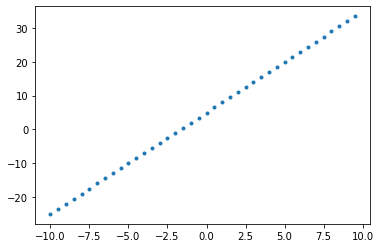

In [1]:
%matplotlib inline
# 描画ライブラリ
import matplotlib.pyplot as plt
# 行列計算ライブラリ
import numpy as np

# 関数オブジェクトを作る
a = 3.
b = 5.
f = lambda x: a * x + b

xs = [x for x in np.arange(-10., 10., 0.5)]
fxs = [f(x) for x in xs]

plt.scatter(xs, fxs, marker='.')
plt.show()

これはモデル（数式）に完全に従っているデータとなる

（モデルからデータを生成しているので，そりゃそうだ）

やりたいのは逆で，データからモデルを推定すること

なので，

- データにノイズを加えて

- そのデータから，データ生成元であるモデルを推定したい

まずはノイズを加える

つまり，

$$
y = f(x) + \epsilon = ax + b + \epsilon
$$

$\epsilon$はノイズ項（ただし，平均0の正規分布に基づくものとする）

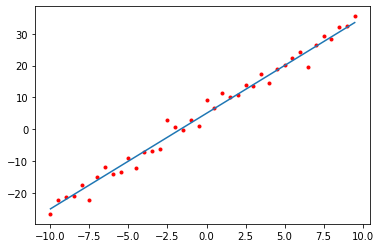

In [18]:
fxs_noised = [f(x) + np.random.normal(0., 2.) for x in xs]

plt.scatter(xs, fxs_noised, marker='.', color='red')
plt.plot(xs, fxs)
plt.show()

赤い点がノイズを付与したもの

この赤点群から，もとの直線のパラメータ$a$, $b$を求めていく

ここで，赤点を次のように表現する

$$
(x_{1}, y_{1}), (x_{2}, y_{2}), \dots , (x_{n}, y_{n}), \dots , (x_{N}, y_{N})
$$

Nは点の数

今回は

In [19]:
print('N = {}'.format(len(xs)))

N = 40


推定したいパラメータ$a$, $b$の直線と，赤点からエラー関数を考える

説明図を下記にプロットする

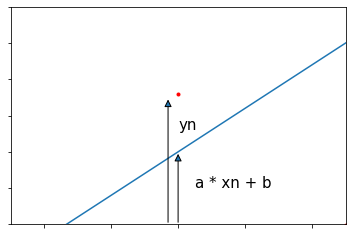

In [79]:
fig, ax = plt.subplots()
ax.scatter(xs, fxs_noised, marker='.', color='red')
ax.plot(xs, fxs)
ax.set_xlim(-1.5, -0.5)
ax.set_ylim(1., 4.)

ax.annotate(
    '', (-1., 2.), (-1., 1.),
    size=15, arrowprops={"arrowstyle": "-|>"})
ax.text(-0.95 , 1.5,'a * xn + b', size=15)
ax.annotate(
    '', (-1.03, 2.75), (-1.03, 1.),
    size=15, arrowprops={"arrowstyle": "-|>"})
ax.text(-1. , 2.3,'yn', size=15)

plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

## エラー関数を決める

- 赤点は$(x_{n}, y_{n})$の位置にある．そのy軸の値は$y_{n}$

- 直線$ax + b$の$x$に$x_{n}$を代入したもの

上記の差が誤差であると考えると，

$$
y_{n} - (ax_{n} + b)
$$

と書ける

今は誤差の大きさを問題とするため，2乗する

(なぜ絶対値じゃなくて2乗するのかはこのあとわかってくるかもしれない)

$$
\{y_{n} - (ax_{n} + b)\}^{2}
$$

これをすべての点について考える．総和をとって

$$
\sum_{n = 1}^{N}\{y_{n} - (ax_{n} + b)\}^{2}
$$

後の処理でいろいろ楽になるので$\frac{1}{2}$かけた関数$J$を

$$
J = \frac{1}{2} \sum_{n = 1}^{N}\{y_{n} - (ax_{n} + b)\}^{2}
$$

この関数$J$の値が最小になるようなパラメータ$a$, $b$を求める

## どうやって？

- 関数$J(a, b)$を考えて

- $a$, $b$それぞれで偏微分してそれぞれ0となるようなパラメータが

- もっともらしいパラメータである

いま，関数$J(a, b)$は，下に凸な2次関数

最小になるときは，勾配が0になるはず

勾配が0というのは，偏微分したらその値が0になるのと同義

つまり

$$
\begin{eqnarray}
\frac{\partial J}{\partial a}
& = & \sum_{n=1}^{N}(y_{n} - ax_{n} - b)(-x_{n}) \\
& = & a \sum_{n=1}^{N} x_{n}^{2} + b \sum_{n=1}^{N}x_{n} - \sum_{n=1}^{N} x_{n}y_{n} = 0 \\
\frac{\partial J}{\partial b}
& = & \sum_{n=1}^{N}(y_{n} - ax_{n} - b)(-1) \\
& = & a \sum_{n=1}^{N} x_{n} + b \sum_{n=1}^{N}1 - \sum_{n=1}^{N}y_{n} = 0 \\
\end{eqnarray}
$$

これを整理すると

$$
\left(
    \begin{array}{cc}
        \sum_{n=1}^{N}x_{n}^{2} & \sum_{n=1}^{N}x_{n} \\
        \sum_{n=1}^{N}x_{n} & \sum_{n=1}^{N}1
    \end{array}
\right)
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right) = 
\left(
    \begin{array}{cc}
        \sum_{n=1}^{N}x_{n}y_{n}\\
        \sum_{n=1}^{N}y_{n}
    \end{array}
\right)
$$

となる．

これを解けばパラメータ$a$, $b$が求まる

numpyでやってみる

In [97]:
# 左辺の行列部分
a_00 = sum([x**2 for x in xs])
a_01 = sum(xs)
a_10 = a_01
a_11 = sum([1 for x in xs])
A = np.array([[a_00, a_01], [a_10, a_11]])
print('A:\n{}'.format(A))

# 右辺の行列部分
b_00 = sum([x * y for x, y in zip(xs, fxs_noised)])
b_10 = sum(fxs_noised)
B = np.array([[b_00], [b_10]])
print('B:\n{}'.format(B))

A:
[[1335.  -10.]
 [ -10.   40.]]
B:
[[4019.57522044]
 [ 177.23526476]]


In [100]:
# 解く
# Aの逆行列を両辺に書けると求まる
C = np.linalg.inv(A) @ B

print('a = {}'.format(C[0,0]))
print('b = {}'.format(C[1,0]))

a = 3.049819164450092
b = 5.193336410183068


最初の方で設定したパラメータと近い値が得られた

データがもっと沢山あればより近くなるはず

## まとめ

最小2乗法は，

- データからモデルのパラメータを推定する方法の一つ

- エラー関数を定義し，それの値を最小化するようなパラメータを求める

- このとき，偏微分や行列計算などの知識が求められる

## ただし

- 出力に含まれるノイズが平均0の正規分布であると仮定しないと使えない

- ロボティクスに限らず，かならず線形な関数に出会えるとは限らない

- ロボティクスへの応用を考えたら，この方法をもっと一般化する必要がある

## ちょっと高みへ（平面当てはめ）

$$
z = f(x, y) + \epsilon = ax + by + c + \epsilon
$$

これは平面を表す式（直線より次元をアップ）

<IPython.core.display.Javascript object>


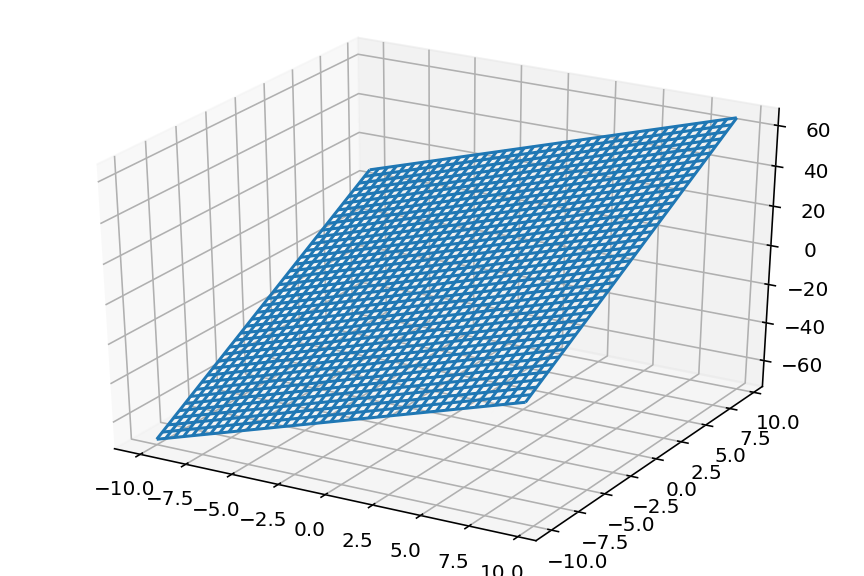

In [29]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

a = 3.
b = 4.
c = -1.
f = lambda x, y: a * x + b * y + c

xs = np.array(np.arange(-10., 10., 0.5))
ys = np.array(np.arange(-10., 10., 0.5))

X, Y = np.meshgrid(xs, ys)
Z = np.array([f(x, y) for x, y in zip(X, Y)])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

plt.show()

同様に，ノイズ$\epsilon$を付加しよう

<IPython.core.display.Javascript object>


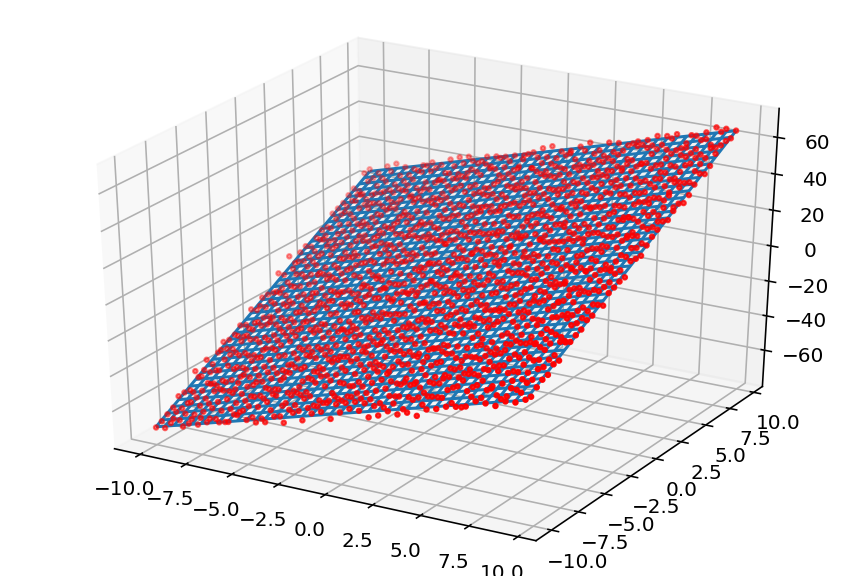

In [30]:
Znoised = np.array(
    [
        f(x, y) + np.random.normal(0., 2.)
        for xe, ye in zip(X, Y)
        for x, y in zip(xe, ye)
    ]).reshape([40, 40])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)
ax.scatter(X, Y, Znoised, color='red', marker='.')
plt.show()

この赤点群とモデル式（パラメータ不明）を武器に，パラメータを推定する

エラー関数を考えていく

素直に書くと，

$$
J = \frac{1}{2}\sum_{n = 1}^{N}\{z_{n} - (ax_{n} + by_{n} + c)\}^{2}
$$

再び偏微分して0の場合を考えていく

(導出は省略．力尽きた）

まとめると

$$
\mathrm{A}\vec{u} = \vec{v}
$$

ここで，$\mathrm{A} = (力尽きた)$, $\vec{u} = (a, b, c)$, $\vec{v} = (力尽きた)$

あるベクトルに行列を掛けて別なベクトルになる，という形になる（線形変換）

実際に解いてみると

In [34]:
A_00 = sum([x**2 for x in X.reshape([1600, 1])])[0]
A_01 = sum([x * y for x, y in zip(X.reshape([1600, 1]), Y.reshape([1600, 1]))])[0]
A_02 = X.sum()
A_10 = A_01
A_11 = sum([y**2 for y in Y.reshape([1600, 1])])[0]
A_12 = Y.sum()
A_20 = A_02
A_21 = A_12
A_22 = sum([1 for x in X.reshape([1600, 1])])

A = np.array(
    [
        [A_00, A_01, A_02],
        [A_10, A_11, A_12],
        [A_20, A_21, A_22]
    ])

B_00 = sum([x * z for x, z in zip(X.reshape([1600, 1]), Znoised.reshape([1600, 1]))])[0]
B_10 = sum([y * z for y, z in zip(Y.reshape([1600, 1]), Znoised.reshape([1600, 1]))])[0]
B_20 = Znoised.sum()

B = np.array([b_00, b_10, b_20]).T

print(A)
print(B)

x = np.linalg.inv(A) @ B
print('param = {}'.format(x))

[[53400.   100.  -400.]
 [  100. 53400.  -400.]
 [ -400.  -400.  1600.]]
[160677.09483344 215066.37965163  -4426.93568729]
param = [ 2.9938154   4.01425227 -1.01481789]


元のパラメータが良く推定できている